In [3]:
import numpy as np
import pandas as pd
import csv
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#READING DATA SET

data = pd.read_csv("startupdata.csv")

In [5]:
#Couting null values in each column.
#print(data.isnull().sum())

In [6]:
#data.info()

In [7]:
#Before filling null values.
#print(data.isnull().sum())

In [8]:
#Filling missing values.
#Now filling the null values.
def imputing_numeric_missing_values(dataset,n_neighbors=10):
    numerical_column_names = dataset.select_dtypes([np.number]).columns
    knn= KNNImputer()
    knn_dataset= knn.fit_transform(dataset[numerical_column_names])
    
    dataset[numerical_column_names]=pd.DataFrame(knn_dataset)
    return dataset

data=imputing_numeric_missing_values(data)

In [9]:
#After fillingout null values.
#print(data.isnull().sum())

In [10]:
#removing the remaining null values.
#But before that we need to rename Unnamed: 6   to Unnamed_6  and state_code.1 to state_code_1 
data =  data.rename(columns={"Unnamed: 6": "Unnamed_6","state_code.1":"state_code_1"})


In [11]:
#data["state_code_1"]

In [12]:
dist = data.Unnamed_6.value_counts(normalize=True)
nan_Unnamed_6 = data['Unnamed_6'].isnull()
data.loc[nan_Unnamed_6,'Unnamed_6'] = np.random.choice(dist.index, size=len(data[nan_Unnamed_6]),p=dist.values)

dist = data.closed_at.value_counts(normalize=True)
nan_closed_at = data['closed_at'].isnull()
data.loc[nan_closed_at,'closed_at'] = np.random.choice(dist.index, size=len(data[nan_closed_at]),p=dist.values)

dist = data.state_code_1.value_counts(normalize=True)
nan_state_code_1 = data['state_code_1'].isnull()
data.loc[nan_state_code_1,'state_code_1'] = np.random.choice(dist.index, size=len(data[nan_state_code_1]),p=dist.values)




In [13]:
#After fillingout null values.
#data.info()

In [14]:
#Converting string values to numeric form.
# here we convert the string based columns into integer or in numeric form.
#Converting to feature name
# state_code
# zip_code
# id
# city
# Unnamed_6
# name
# founded_at
# closed_at
# first_funding_at
# last_funding_at
# state_code_1
# category_code
# object_id
# status

ord_enc = OrdinalEncoder()
enc = LabelEncoder()   

enc.fit(data['state_code']) 
data["state_code"] = ord_enc.fit_transform(data[["state_code"]])

enc.fit(data['zip_code']) 
data["zip_code"] = ord_enc.fit_transform(data[["zip_code"]])

enc.fit(data['id']) 
data["id"] = ord_enc.fit_transform(data[["id"]])


enc.fit(data['city']) 
data["city"] = ord_enc.fit_transform(data[["city"]])

enc.fit(data['Unnamed_6']) 
data["Unnamed_6"] = ord_enc.fit_transform(data[["Unnamed_6"]])

enc.fit(data['founded_at']) 
data["founded_at"] = ord_enc.fit_transform(data[["founded_at"]])

enc.fit(data['closed_at']) 
data["closed_at"] = ord_enc.fit_transform(data[["closed_at"]])

enc.fit(data['first_funding_at']) 
data["first_funding_at"] = ord_enc.fit_transform(data[["first_funding_at"]])

enc.fit(data['last_funding_at']) 
data["last_funding_at"] = ord_enc.fit_transform(data[["last_funding_at"]])

enc.fit(data['object_id']) 
data["object_id"] = ord_enc.fit_transform(data[["object_id"]])

to_drop = ['state_code_1']
data.drop(to_drop, axis=1, inplace=True)

enc.fit(data['name']) 
data["name"] = ord_enc.fit_transform(data[["name"]])


enc.fit(data['category_code']) 
data["category_code"] = ord_enc.fit_transform(data[["category_code"]])


#Now we will convert the status to binary value.
# 1. Binarizing the class names.
diag_map = {'acquired':1, 'closed':0}
data['status'] = data['status'].map(diag_map)
# 1.1 chaging the name of colums status to : is_aquired
data.rename(columns={'status':'is_acquired'}, inplace=True)

In [15]:

#data.head()

In [16]:
#Now standarizing some specific columns.
#Since we have decided to keep is_acquired as out class label column. 
#for classification purposed. So except this 
#and columns which are showing labels or behaving like
#categorical data we will not convert them.

#data[0:46] = StandardScaler().fit_transform(data[0:46])

features_mean= list(data.columns[0:46])
data[data.columns[0:46]] = StandardScaler().fit_transform(data[data.columns[0:46]])


In [17]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed_6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,1.297828,-0.777525,1.027268,1.451271,0.327768,1.317782,0.801958,0.846197,-1.449539,0.738961,...,1.317782,-0.695646,1.71104,-1.016386,-0.803291,-0.551065,-0.332731,-0.981320,0.0,1
1,-1.104657,-0.777525,-0.341900,-0.823630,1.067640,-1.091815,-0.293272,-0.273563,1.203933,0.738961,...,-1.091815,1.437514,-0.58444,-1.016386,1.244879,1.814669,3.005430,1.020191,1.0,1
2,1.285831,-0.777525,-1.501922,-0.610018,0.336371,1.302746,0.801958,0.758943,0.467275,0.738961,...,1.302746,-0.695646,-0.58444,0.983879,-0.803291,-0.551065,-0.332731,0.619888,1.0,1
3,0.497000,-0.777525,-0.320134,-0.827040,1.041831,0.494534,-1.186306,-1.131561,0.944599,0.738961,...,0.494534,-0.695646,-0.58444,-1.016386,1.244879,1.814669,3.005430,0.264047,1.0,1
4,1.288830,-0.777525,-0.197397,-0.843535,0.714911,1.306505,0.818808,0.846197,-0.412205,-1.353251,...,1.306505,1.437514,1.71104,-1.016386,-0.803291,-0.551065,-0.332731,-0.981320,1.0,0


In [18]:
#Now making selection of attrbutes from dataset.
#So we have two reasons to drop a column from dataset. Either that is un necessary like it may be the id of some column and 
#other reason can be that there exist some other columns which are highly co-related to it, due to that we can remove all 
#and can keep only one column.
#So first of all we need to see that co-relation graph.

# Now ploting the graph
def draw_heatmap(dataset):
    
    
    f, ax = plt.subplots(figsize = (18, 18))
    
    corrMatt = dataset.corr(method='spearman')
    
    sns.heatmap(corrMatt, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
    #plt.show()
    
    
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
numerical_df_1=data.select_dtypes(numerics)
numerical_column_names = data.select_dtypes(numerics).columns

#draw_heatmap(numerical_df_1)

In [19]:

# we have summed that for strong relation threshold is 0.7>= so we have will have few columns which need to be remove due to strong relation. Following will be removed.

# o	See there is strong co-relation between age_first_funding_year and last_funding_year so we need to remove either of them. I am removing  first_funding_year.

# o	See there is strong co-relation between longitude and is_CA so we need to remove either of them. I am removing  longitude. 

# o	See there is strong co-relation between age_first_milestone_year and age_last_milestone_ so we need to remove either of them. I am choosing age_last_milestone_

# and we will drop the all keys columns aswell.
# 1.	Unnamed: 0
# 2.	Unnamed: 6
# 3.	id
# 4.	object_id




to_drop = ['age_first_funding_year','age_first_milestone_year','longitude','Unnamed: 0','Unnamed_6','id',"object_id"]
data.drop(to_drop, axis=1, inplace=True)


In [20]:
#data.info()


In [21]:
#Redarwing after deletion of attrbutes.
# numerical_df_1=data.select_dtypes(numerics)
# numerical_column_names = data.select_dtypes(numerics).columns

# draw_heatmap(numerical_df_1)

In [23]:
    # Now we will again remove 
    # •	labels
    # •	state_code
    # •	is_CA

to_drop = ['labels','state_code',"is_CA"]
data.drop(to_drop, axis=1, inplace=True)


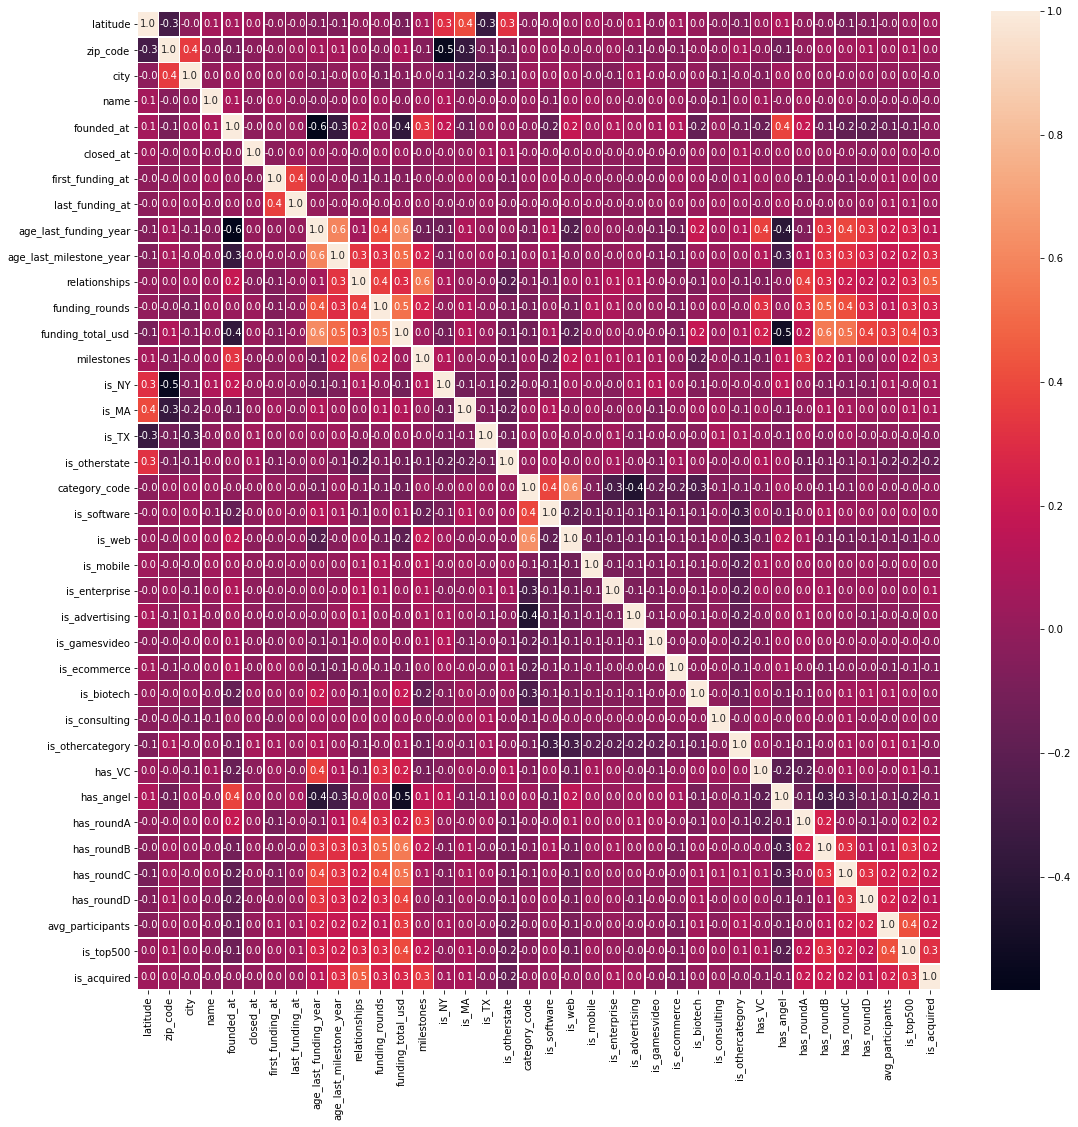

In [24]:
#Redarwing after deletion of attrbutes.
numerical_df_1=data.select_dtypes(numerics)
numerical_column_names = data.select_dtypes(numerics).columns

draw_heatmap(numerical_df_1)